In [12]:
import deepxde as dde
from deepxde.backend import tf

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
torch.cuda.is_available()

True

In [5]:
x = torch.ones(3, device=torch.device("cuda"))

In [6]:
x

tensor([1., 1., 1.], device='cuda:0')

In [7]:
x = x.to("cpu")

In [8]:
x

tensor([1., 1., 1.])

In [9]:
y = x.numpy()

In [10]:
y

array([1., 1., 1.], dtype=float32)

In [11]:
z = torch.tensor(y, device=torch.device("cpu"))
z

tensor([1., 1., 1.])

Back Propogation

In [13]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad= True)

In [14]:
y_hat = w*x
s = y_hat-y
loss = (s)**2

In [15]:
print(loss)

tensor(1., device='cuda:0', grad_fn=<PowBackward0>)


In [16]:
loss.item()

1.0

In [17]:
loss.backward()

In [19]:
print(w.grad)
print(w.grad.item())

tensor(-2., device='cuda:0')
-2.0


Heat Equation Numerically

In [20]:
from matplotlib import pyplot as plt

[[100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]
 ...
 [100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]
 [100.   0.   0. ...   0.   0. 200.]]


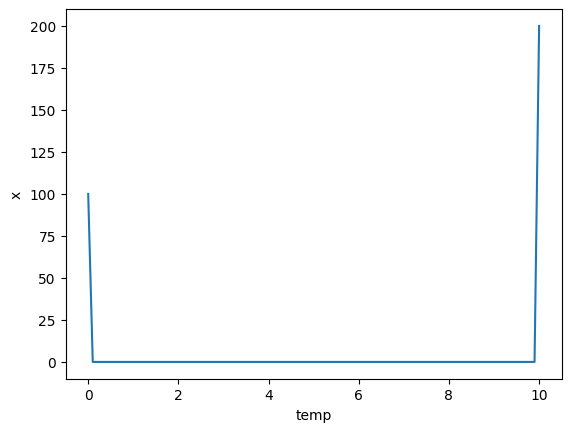

In [21]:
length = 10
k = 0.89 #aluminum
temp_left = 100
temp_right = 200
total_sim_time = 10

#----- discritization
dx = 0.1
x_vec = np.linspace(0, length, int(length/dx))

dt = 0.0001
t_vec = np.linspace(0, total_sim_time, int(total_sim_time/dt))

#----- I.C.
u = np.zeros([len(t_vec), len(x_vec)])

#----- B.C.
u[:,0] = temp_left
u[:,-1] = temp_right

print(u)

plt.plot(x_vec, u[0])
plt.xlabel('temp')
plt.ylabel('x')
plt.show()